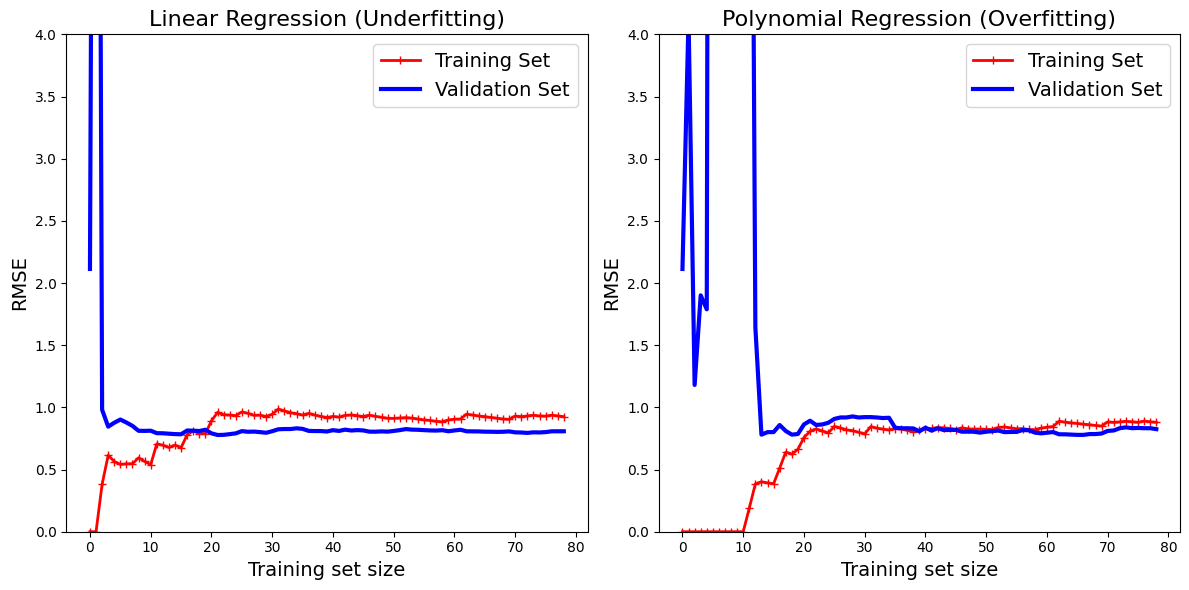

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the learning curves
def plot_learning_curves(model, X_train, y_train, X_val, y_val):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.title("Learning Curves", fontsize=16)

# Linear Regression (Underfitting)
lin_reg = LinearRegression()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plot_learning_curves(lin_reg, X_train, y_train, X_val, y_val)
plt.ylim(0, 4)
plt.title("Linear Regression (Underfitting)", fontsize=16)

# Polynomial Regression (Overfitting)
plt.subplot(1, 2, 2)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
plot_learning_curves(poly_reg, X_poly, y_train, poly_features.transform(X_val), y_val)
plt.ylim(0, 4)
plt.title("Polynomial Regression (Overfitting)", fontsize=16)

plt.tight_layout()
plt.show()


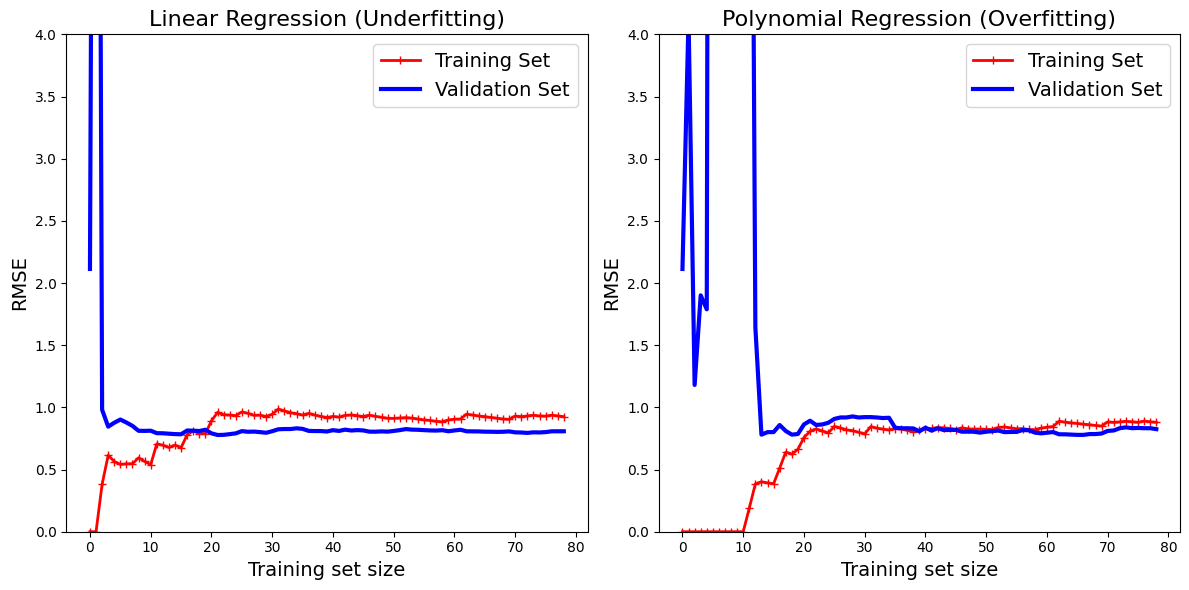

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 1 + 2 * X + np.random.randn(100, 1)

# Split the data into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to plot the learning curves
def plot_learning_curves(model, X_train, y_train, X_val, y_val, ax, title):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))

    ax.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training Set")
    ax.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation Set")
    ax.legend(loc="upper right", fontsize=14)
    ax.set_xlabel("Training set size", fontsize=14)
    ax.set_ylabel("RMSE", fontsize=14)
    ax.set_title(title, fontsize=16)

# Linear Regression (Underfitting)
lin_reg = LinearRegression()
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(1, 2, 1)
plot_learning_curves(lin_reg, X_train, y_train, X_val, y_val, ax1, "Linear Regression (Underfitting)")
plt.ylim(0, 4)

# Polynomial Regression (Overfitting)
ax2 = plt.subplot(1, 2, 2)
poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
plot_learning_curves(poly_reg, X_poly, y_train, poly_features.transform(X_val), y_val, ax2, "Polynomial Regression (Overfitting)")
plt.ylim(0, 4)

plt.tight_layout()
plt.show()
